<a href="https://colab.research.google.com/github/KPxto/bootcamp-alura/blob/master/BootcampDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Alura - Semana 1

### **Aula 01**

### Importando as bibliotecas

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')
import collections

### Carregando nosso dataset

In [58]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'
dados = pd.read_csv(url, encoding='latin1', sep=';',
              skiprows=3, skipfooter=12, thousands='.', decimal=',')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# setando opção de visualização do número
pd.options.display.float_format = '{:.2f}'.format

In [60]:
# visualizando as 5 primeiras linhas 
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [61]:
# media de todo DF
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

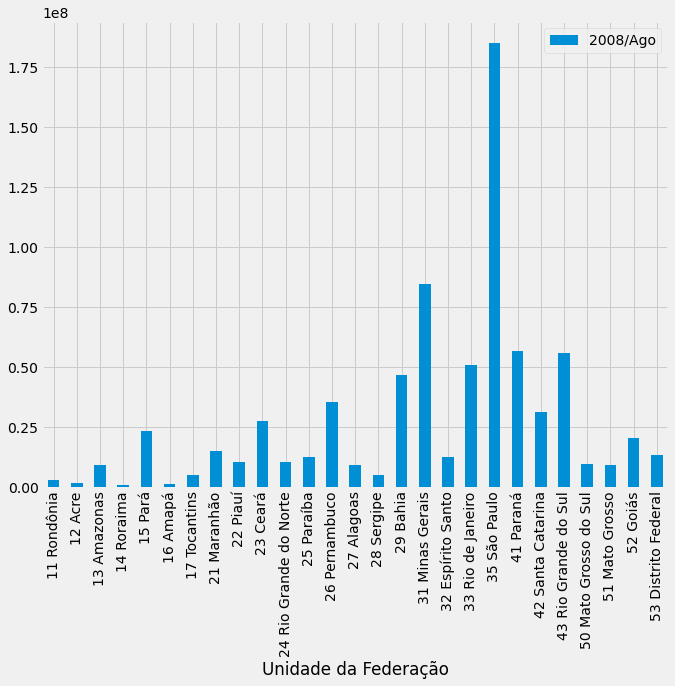

In [62]:
# plotando um grafico simples com pandas
dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,8));

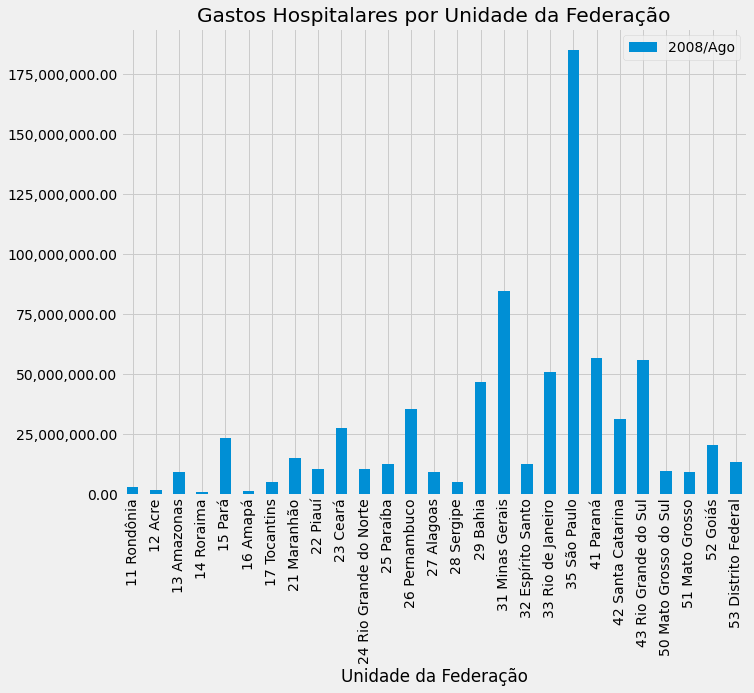

In [63]:
# alterando o grafico anterior com matplotlib e analisando dados do mes mais recente
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(10,8))
# codigo para alterar formatação dos ticks do eixo y para 2 casas decimais
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 
plt.title('Gastos Hospitalares por Unidade da Federação');

In [64]:
# verificando nossos dados vemos que temos 2 colunas como objeto, quando deveriamos ter somente 1, a dos estados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [65]:
# vamos ver quais colunas objeto sao essas
dados.select_dtypes(exclude='number')

,Unidade da Federação,2009/Set,2020/Ago
0,11 Rondônia,3605007.43,10285455.78
1,12 Acre,-,-
2,13 Amazonas,9730634.16,14726443.67
3,14 Roraima,1701611.25,2826486.18
4,15 Pará,27967969.22,39911193.02
5,16 Amapá,2034329.78,2942273.94
6,17 Tocantins,6542918.14,8240261.38
7,21 Maranhão,19722895.51,28587541.78
8,22 Piauí,12247027.29,23210624.20
9,23 Ceará,34471579.06,59808605.59


In [66]:
# vamos padronizar a coluna 2009/Set para ficar igual as outras do conjunto de dados
dados.replace('-', 0, inplace=True)
dados['2009/Set'] = dados['2009/Set'].astype(float)

In [67]:
# verificando novamente, nosso problema foi resolvido
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(152), object(2)
memory usage: 32.6+ KB


In [68]:
dados.select_dtypes(exclude='number')

,Unidade da Federação,2020/Ago
0,11 Rondônia,10285455.78
1,12 Acre,0
2,13 Amazonas,14726443.67
3,14 Roraima,2826486.18
4,15 Pará,39911193.02
5,16 Amapá,2942273.94
6,17 Tocantins,8240261.38
7,21 Maranhão,28587541.78
8,22 Piauí,23210624.20
9,23 Ceará,59808605.59


### **Aula 02**

### Vamos carregar o proximo dataset 

In [69]:
# vamos pegar os dados do url disponibilizado pela Alura
url2 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
dados2 = pd.read_csv(url2, encoding='latin1', sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [71]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [72]:
# visualizando 2 colunas
dados2[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [73]:
# aplicando a media para retornar um subset de valores nao nulos
# depois pegaremos somente os indices
# esses indices formarao uma lista com as colunas desejadas
# para completar a lista, vamos inserir o valor referindo-se aos estados 
colunas_usaveis = dados2.mean().index.to_list()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [74]:
# criando novo dataframe a partir do subset anterior
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [75]:
# setando o novo indice com os estados sendo as chaves
usaveis.set_index('Unidade da Federação', inplace=True)

In [76]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

### Plotando um grafico do meu estado

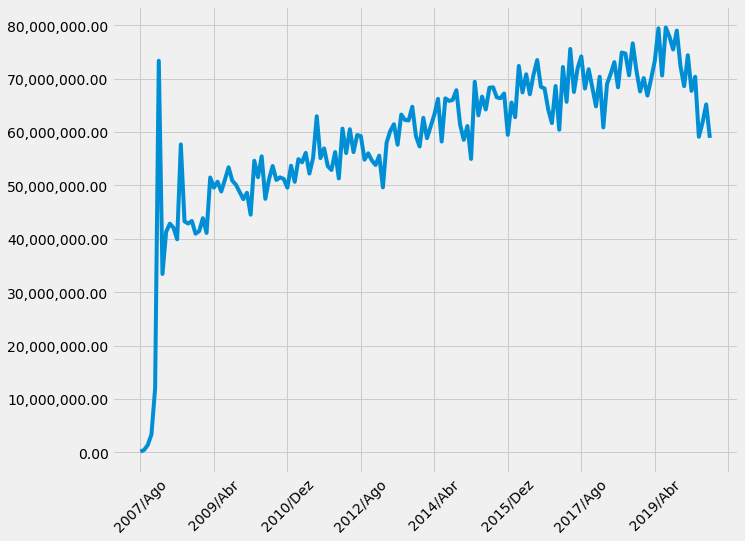

In [77]:
bahia = usaveis.loc['29 Bahia']
del bahia['Total']
ax = bahia.plot(x=bahia.index, y=bahia.values, figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=45);

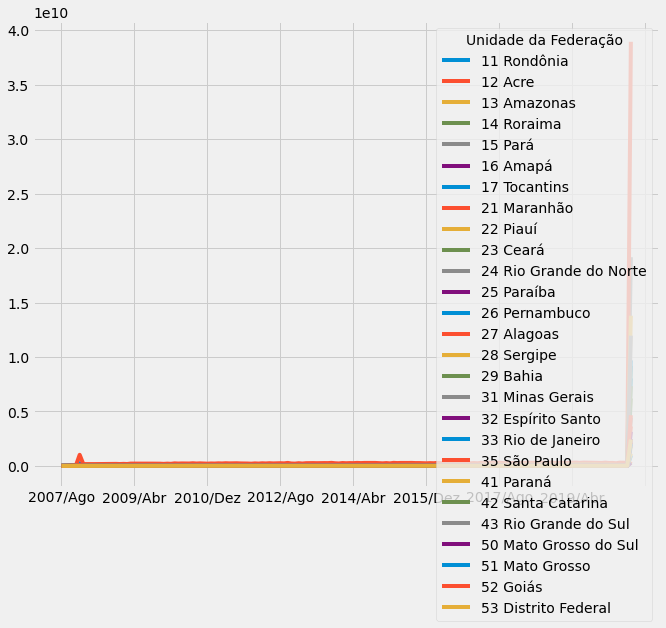

In [78]:
# aqui vamos transpor nosso df para que as datas fiquem no eixo x
# vemos que os ultimos valores do grafico tem uma subida brusca
# esta subida deve-se a coluna 'Total', que distorce a visualização
usaveis.T.plot(figsize=(10,8))

In [79]:
# vamos excluir a coluna total
usaveis = usaveis.drop('Total', axis=1)

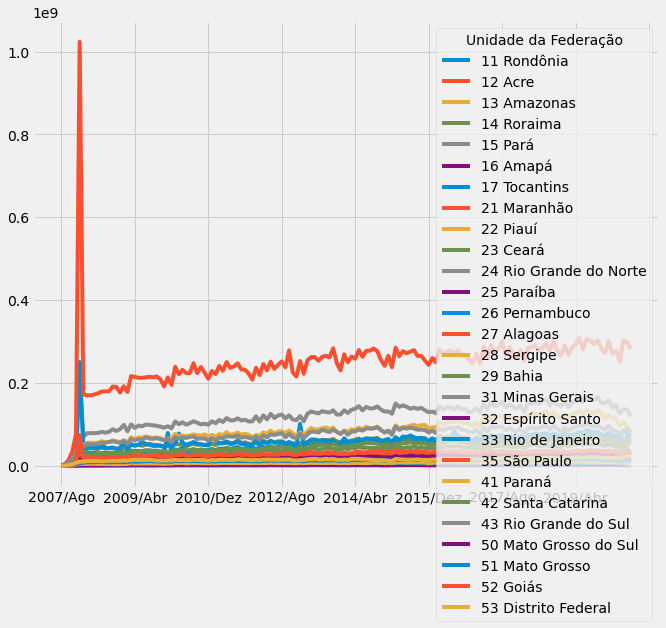

In [80]:
usaveis.T.plot(figsize=(10,8))

### Reposicionar a legenda

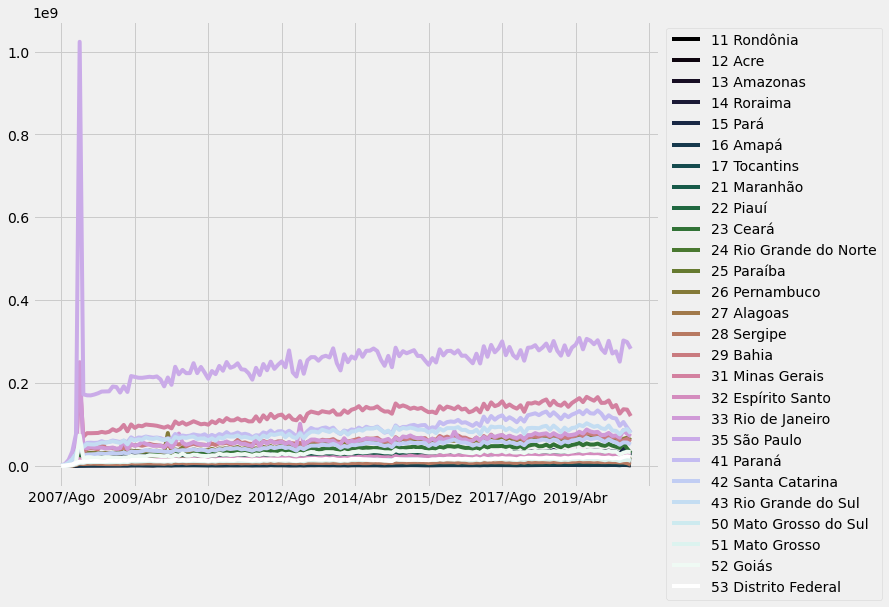

In [81]:
cm = plt.get_cmap('cubehelix')
usaveis.T.plot(figsize=(10,8), cmap=cm)
plt.legend(bbox_to_anchor=(1, 1));

### Verificando os 5 maiores gastadores

In [82]:
# vamos pegar os 5 maiores gastadores
top5 = usaveis.sum(axis=1).nlargest(5).index.to_list()

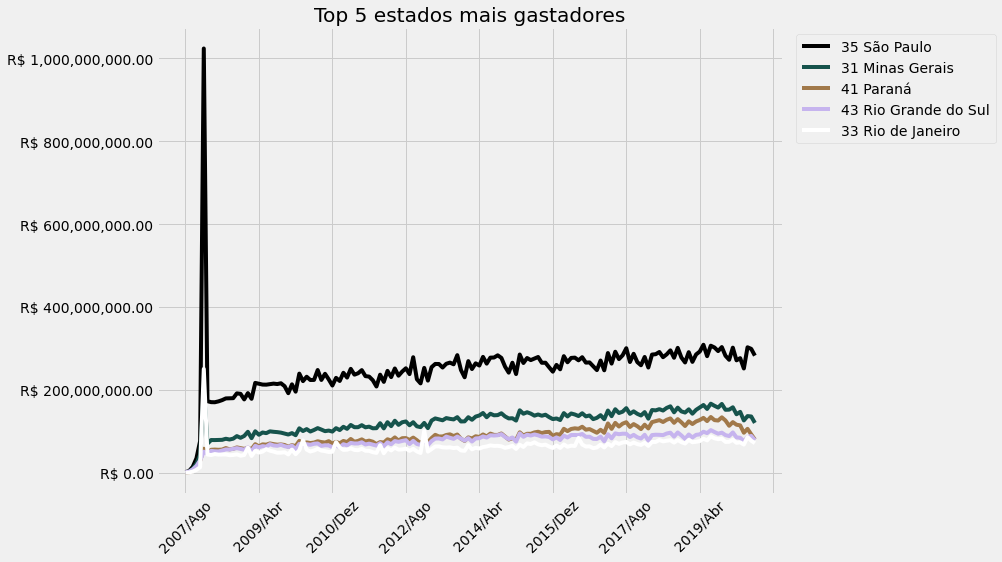

In [83]:
ax = usaveis.loc[top5].T.plot(figsize=(10,8), colormap='cubehelix')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Top 5 estados mais gastadores');

## **Aula 03**

### Criando nova coluna de região

In [84]:
# vamos colocar os estados numa lista para que possamos percorre-la
# depois vamos criar uma formula que vai atribuir a regiao de cada estado
lista_estados = usaveis.index.to_list()
def regiao(ls):
  for i in ls:
    if i[0]=='1':
      return 'Norte'
    if i[0]=='2':
      return 'Nordeste'
    if i[0]=='3':
      return 'Sudeste'
    if i[0]=='4':
      return 'Sul'
    if i[0]=='5':
      return 'Centro Oeste'

In [85]:
# vamos criar a nova coluna usando a função map
usaveis['Regiao'] = list(map(regiao, lista_estados))

In [86]:
# demonstração de que nosso código funcionou
usaveis.sample(10)['Regiao']

Unidade da Federação
52 Goiás                  Centro Oeste
16 Amapá                         Norte
43 Rio Grande do Sul               Sul
26 Pernambuco                 Nordeste
17 Tocantins                     Norte
14 Roraima                       Norte
11 Rondônia                      Norte
28 Sergipe                    Nordeste
51 Mato Grosso            Centro Oeste
24 Rio Grande do Norte        Nordeste
Name: Regiao, dtype: object

In [87]:
# vamos calcular a média de gastos por região
# depois vamos transpor a tabela para facilitar na plotagem do gráfico
media_regiao = usaveis.groupby('Regiao').mean().T

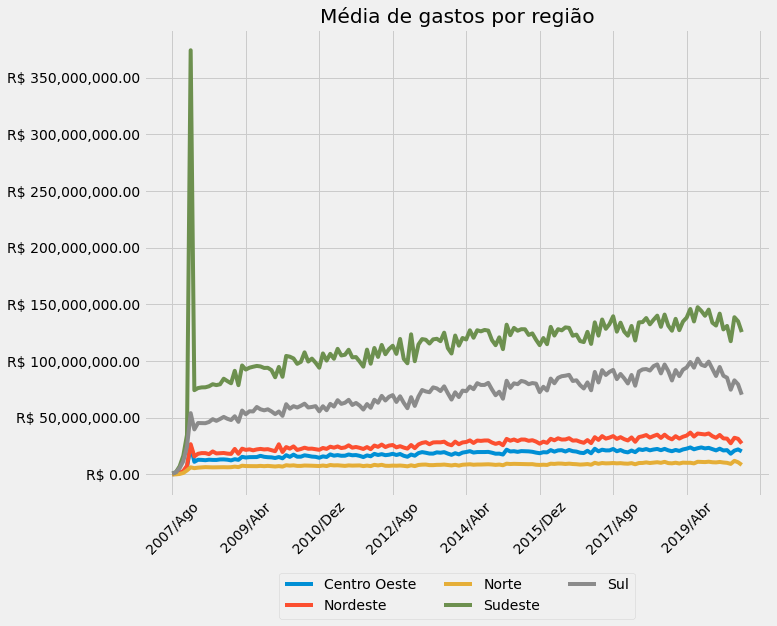

In [88]:
# aqui vamos plotar nosso gráfico
ax = media_regiao.plot(figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(0.5, -0.15), loc ='upper center', ncol=3)
plt.title('Média de gastos por região')
plt.xticks(rotation=45);

### Comparação entre os top5 gastadores com o estado da Bahia

In [89]:
# adicionando o item Bahia a lista do top5
top5.insert(0, '29 Bahia')

In [90]:
# criando um dataframe a partir das colunas na lista top5
top5mais1 = usaveis.loc[top5].T
top5mais1.drop('Regiao', axis=0, inplace=True)

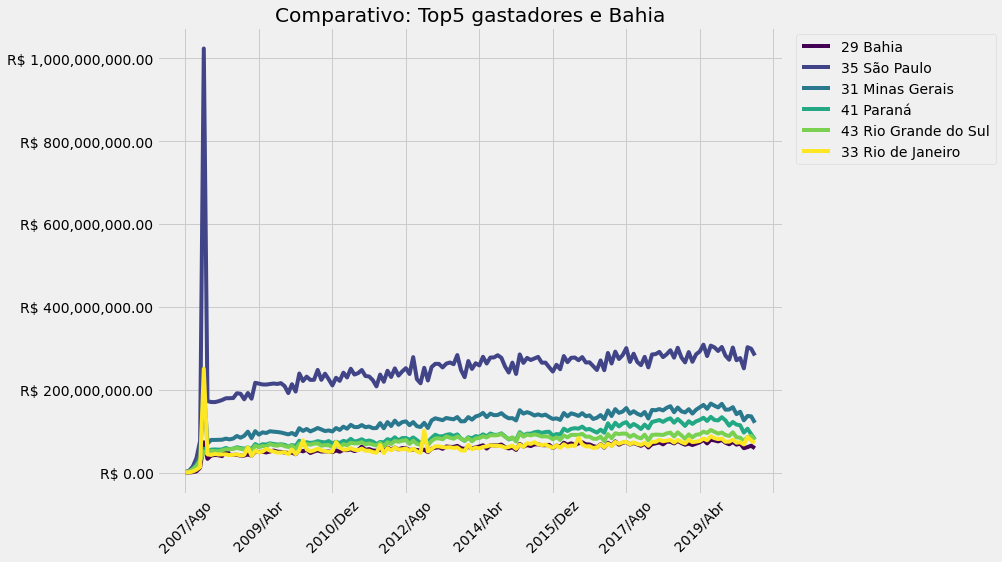

In [91]:
# hora de plotar
ax = top5mais1.plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Comparativo: Top5 gastadores e Bahia');

### Selecionando dados a partir de Fevereiro de 2008

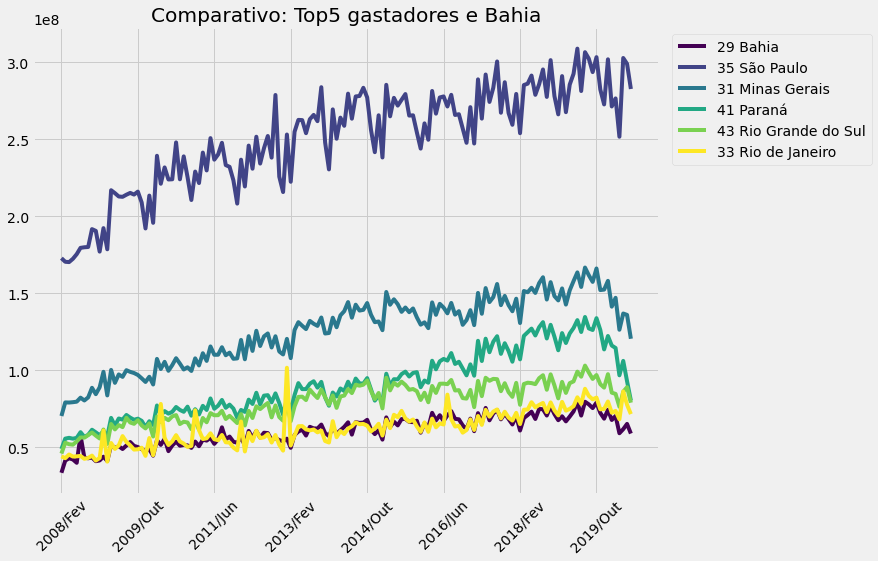

In [92]:
# aqui vamos iniciar a contagem a partir de Fevereiro de 2008
top5mais1.loc['2008/Fev':].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Comparativo: Top5 gastadores e Bahia');

### Plotar só os estados da região sudeste e ver se os estados foram afetados de forma similar entre 2012/2013

In [93]:
# primeir vamos capturar somente os estados do sudeste
# pegamos a partir de Fev de 2008 pq é a partir daí que tem dados válidos
sudeste = usaveis.loc[:,'2008/Fev':].groupby('Regiao').get_group('Sudeste')
sudeste.drop('Regiao', axis=1, inplace=True) # essa linha não vai servir pra nada

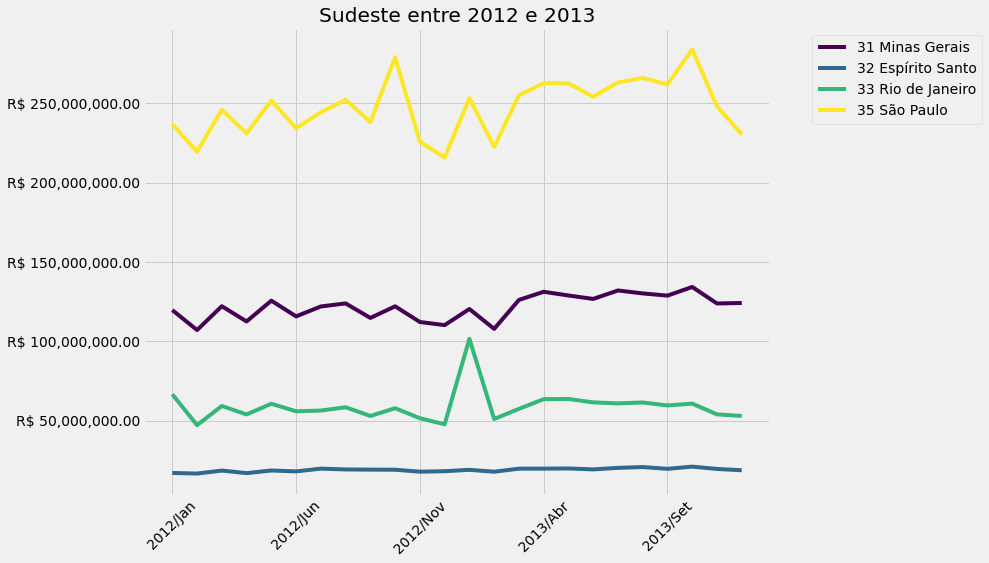

In [94]:
# agora selecionamos a data para entre Jan de 2012 e Dez de 2013
ax = sudeste.T.loc['2012/Jan':'2013/Dez'].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xticks(rotation=45)
plt.title('Sudeste entre 2012 e 2013');

In [95]:
# agora vamos adicionar mais um estado para fazer o comparativo
bahia = usaveis.T.loc['2008/Fev':]['29 Bahia']
bahia.drop('Regiao', axis=0, inplace=True)
sudeste = sudeste.append(bahia).T

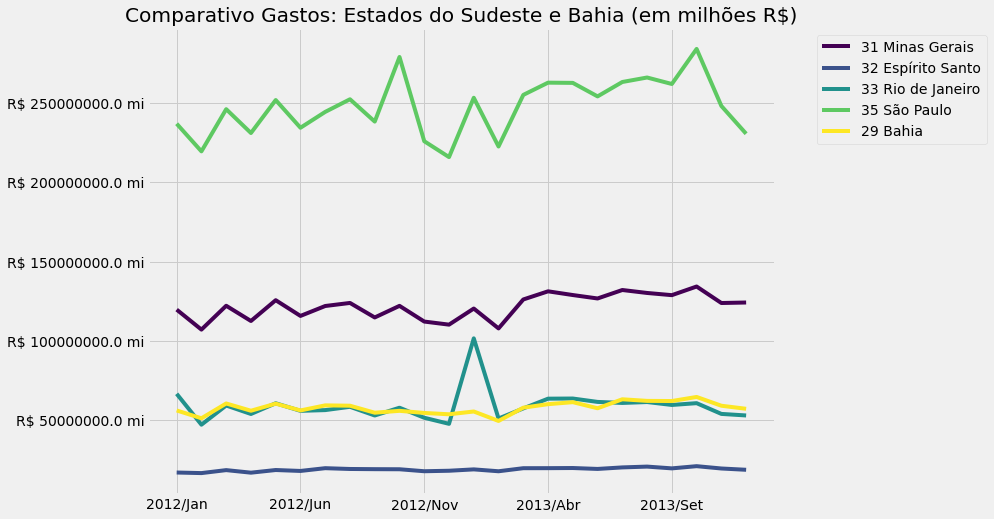

In [96]:
# agora vamos plotar
ax = sudeste.loc['2012/Jan':'2013/Dez'].plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x} mi'))
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.annotate('Incremento repentino em Janeiro de 2013', xy=(12.0, 97.0), xytext=(15.0, 100.0), arrowprops=dict(facecolor='black', shrink=0.05));
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

## **Aula 04**

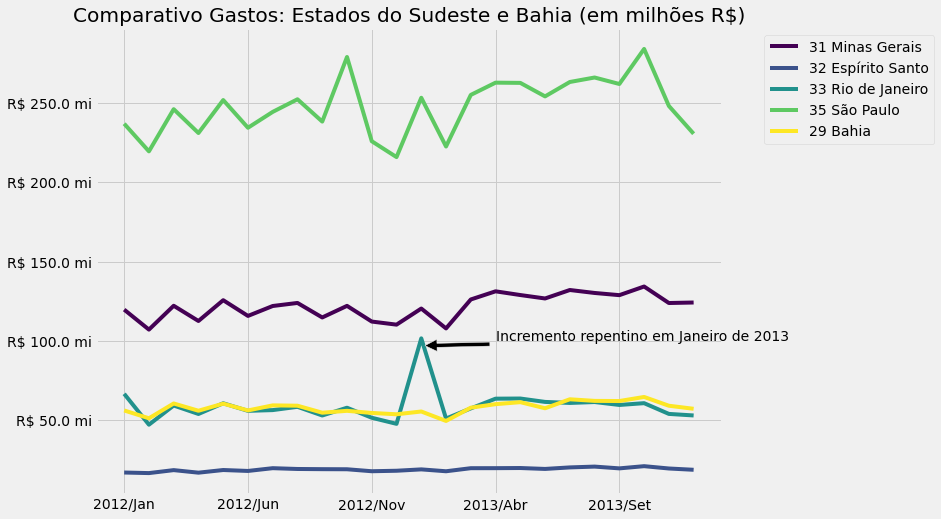

In [97]:
# vamos plotar o grafico novamente, mas melhorando o eixo y
# veja que dividimos os valores por um milhao para melhor legibilidade
ax = (sudeste.loc['2012/Jan':'2013/Dez']/1000000).plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:} mi"))
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.annotate('Incremento repentino em Janeiro de 2013', xy=(12.0, 97.0), xytext=(15.0, 100.0), arrowprops=dict(facecolor='black', shrink=0.05));
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

Manipulando um pouco o eixo Y da para perceber a distorção causada na comparação dos dados, trazendo desinformação. O valor inicial do eixo y foi colocado como 50, trazendo dados de alguns bem abaixo do grafico, causando uma ilusão de maior distanciamento do que o real entre os menos gastadores e os mais gastadores.

Um olhar desatento para o gráfico (sem fazer a leitura) mostra que SP gastou umas 4 vezes mais que RJ em Janeiro de 2013.

No entanto, ao fazer a devida leitura, somos informados que a diferença de gastos é de 2.5 vezes.

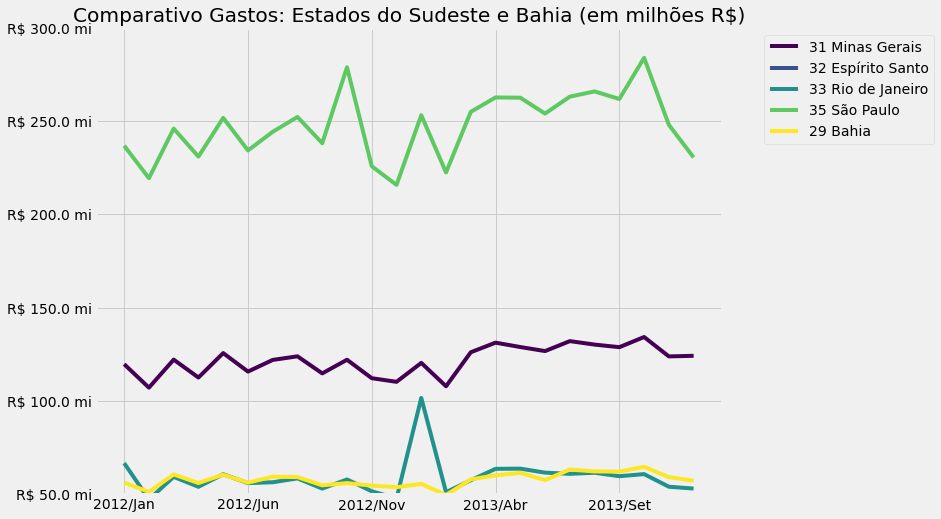

In [98]:
# vamos plotar o grafico novamente, mas melhorando o eixo y
# veja que dividimos os valores por um milhao para melhor legibilidade
ax = (sudeste.loc['2012/Jan':'2013/Dez']/1000000).plot(figsize=(10,8), colormap='viridis')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:} mi"))
plt.ylim([50, 300])
plt.legend(bbox_to_anchor=(1.35, 1.))
plt.title('Comparativo Gastos: Estados do Sudeste e Bahia (em milhões R$)');

## **Aula 05**

In [99]:
usaveis['Total'] = usaveis.sum(axis=1)

In [100]:
# vamos criar o dataframe organizando as linhas por total de gasto em ordem decrescente
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total.drop(['Total', 'Regiao'], axis=1, inplace=True)

In [101]:
# aqui vamos pegar o ultimo mes (ultima coluna)
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [102]:
# vamos pegar os gastos mais recentes de todos estados
gastos_mais_recentes = ordenado_por_total[mes_mais_recente]
gastos_mais_recentes.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

Plotando em pizza para comprovar como modelo de grafico e ineficiente:
- muita bagunça nas legendas
- impossível de comparar valores e grandezas
- sem precisão nenhuma
- cores repetidas
- ruim para definir ordem
- nao da para saber os valores absolutos

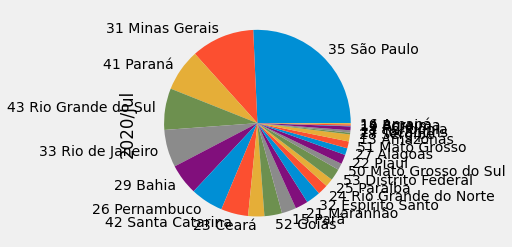

In [103]:
gastos_mais_recentes.plot(kind='pie')

Uma simples tabela é melhor para comparar grandezas.
Tomemos o estado do RJ por exemplo. Basta dividirmos o gasto de cada estado pelo gasto do RJ e teremos os valores relativos.

In [104]:
gastos_mais_recentes / gastos_mais_recentes['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

Seguindo o desafio da aula 5, vamos comparar os gastos da Bahia com o das outras unidades da federação.
Vamos deixar o valores organizados em ordem decrescente.
<br>
<br>
**desafio: criar tabela de comparação com seu estado (ou estado de preferência)**

In [105]:
(gastos_mais_recentes / gastos_mais_recentes['29 Bahia']).sort_values(ascending=False)

Unidade da Federação
35 São Paulo             4.80
31 Minas Gerais          2.05
41 Paraná                1.36
43 Rio Grande do Sul     1.34
33 Rio de Janeiro        1.21
26 Pernambuco            1.06
29 Bahia                 1.00
42 Santa Catarina        0.88
52 Goiás                 0.57
23 Ceará                 0.52
15 Pará                  0.47
32 Espírito Santo        0.47
21 Maranhão              0.41
53 Distrito Federal      0.38
24 Rio Grande do Norte   0.33
22 Piauí                 0.31
25 Paraíba               0.26
13 Amazonas              0.23
27 Alagoas               0.22
51 Mato Grosso           0.22
50 Mato Grosso do Sul    0.21
11 Rondônia              0.13
17 Tocantins             0.08
28 Sergipe               0.06
14 Roraima               0.05
16 Amapá                 0.04
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

Vamos ver a tabela acima representada num grafico de barras.
<br><br>
Ainda comparando com o grafico de pizza, veja como o grafico em barra é mais claro para visualização dos dados.

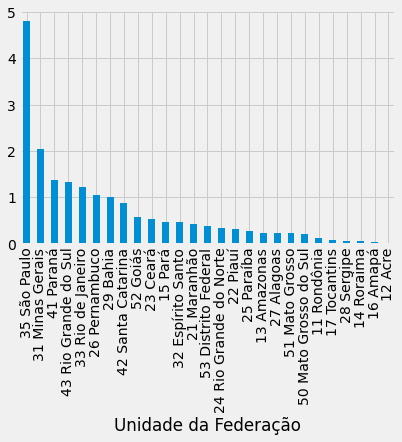

In [106]:
(gastos_mais_recentes / gastos_mais_recentes['29 Bahia']).sort_values(ascending=False).plot(kind='bar');

Continuando a brincadeira com a eficiência do grafico me barras, veja os top10 gastadores.

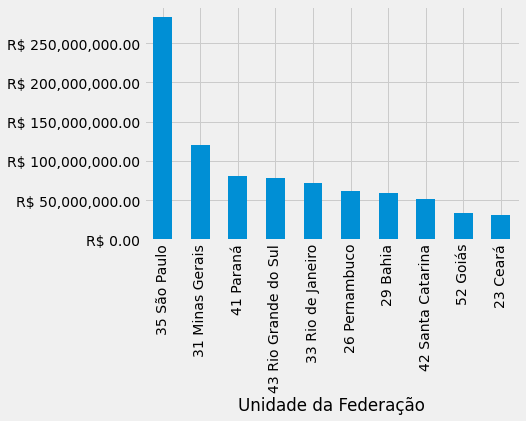

In [107]:
ax = gastos_mais_recentes.head(10).sort_values(ascending=False).plot(kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'));

desafio: compara gastos por estado comparando com respectivas populações

In [108]:
# vamos pegar a tabela de população por estado da página da wikipedia
url_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
populacao_por_estado = pd.read_html(url_wiki)[0]
populacao_por_estado = populacao_por_estado[['Unidade federativa', 'População']]
populacao_por_estado.sort_values('Unidade federativa', inplace=True)

In [109]:
# aqui vamos limpar o nome dos estados tirando o numero que vem no inicio
gastos_mais_recentes.index = [i[3:] for i in gastos_mais_recentes.index]

In [170]:
# a transformação de Series para Dataframe vai facilitar nossas operações
gastos_mais_recentesdf = pd.DataFrame(gastos_mais_recentes)
gastos_mais_recentesdf = gastos_mais_recentesdf.sort_index()

In [176]:
# transformando a coluna população para facilitar nos cálculos
populacao_por_estado['População'] = populacao_por_estado['População'].astype('int32')
populacao_por_estado.set_index('Unidade federativa', inplace=True)

In [193]:
# unindo os 2 dataframes
gastos_populacao = pd.concat([gastos_mais_recentesdf['2020/Jul'], populacao_por_estado['População']], axis=1)

In [198]:
# adicionando nova coluna e organizando por gasto/habitante
gastos_populacao['gasto_hab'] = gastos_populacao['2020/Jul']/gastos_populacao['População']
gastos_populacao.sort_values('gasto_hab', ascending=False, inplace=True)
gastos_populacao.head()

,2020/Jul,População,gasto_hab
Unidade federativa,,,
Distrito Federal,22233542.26,3055149,7.28
Santa Catarina,51764534.76,7279638,7.11
Paraná,80320852.69,11516840,6.97
Rio Grande do Sul,78929703.81,11422973,6.91
Espírito Santo,27460475.47,4064052,6.76


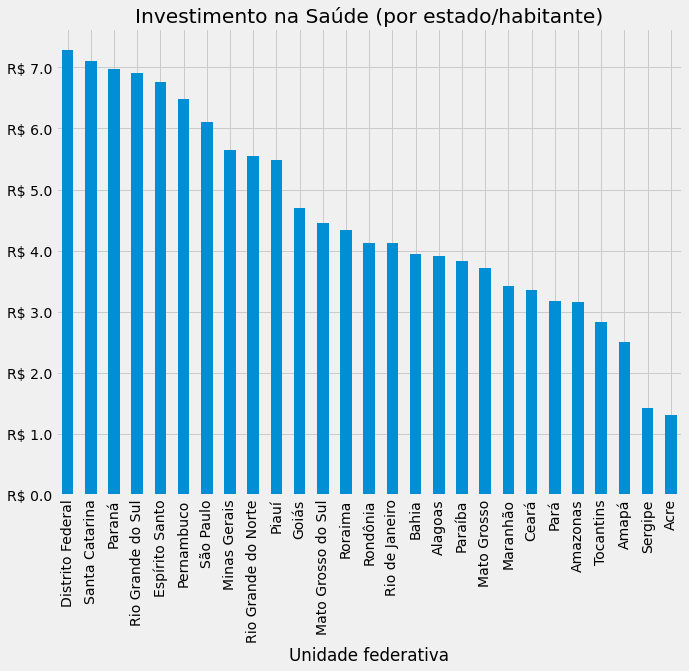

In [213]:
# aqui vamos visualizar nossos dados
ax = gastos_populacao.plot(y='gasto_hab', kind='bar', figsize=(10,8), legend=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:}'))
plt.title('Investimento na Saúde (por estado/habitante)');